# **Resumo**
#### Este notebook contem uma análise detalhada seguida de **vários modelos de machine learning** com o intuito de predizer a quantidade de sobreviventes **faltantes** do titanic, e ao final, exibir qual modelo teve maior acurácia

#### **Resumo do que será feito:** será realizada uma mineração dos dados, depois que os dados estiverem prontos, será feita uma simples predição das idades faltantes, apos isso, dará inicio **as predições de varios modelos para os sobreviventes.**

In [341]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [342]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

***
# Visão geral dos datasets

In [343]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [344]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# **Definindo o id do passageiro como index em ambos os dataframes**

In [345]:
test.set_index("PassengerId",inplace=True)
train.set_index("PassengerId",inplace=True)


# **Concatenando os dataframes de treino e teste, exibindo o dataframe bruto**

In [346]:
df = pd.concat([train, test],sort=True); df_bruto = pd.concat([train,test])
df.head()

Age Cabin Embarked  ...  SibSp Survived            Ticket
PassengerId                       ...                                  
1            22.0   NaN        S  ...      1      0.0         A/5 21171
2            38.0   C85        C  ...      1      1.0          PC 17599
3            26.0   NaN        S  ...      0      1.0  STON/O2. 3101282
4            35.0  C123        S  ...      1      1.0            113803
5            35.0   NaN        S  ...      0      0.0            373450

[5 rows x 11 columns]

# **Traduzindo Colunas**

In [347]:

df.columns = ['Idade', 'Cabine', 'Embarque', 'Tarifa', 'Nome', 'Pais e Filhos', 'Classe', 'Sexo',
       'Irmaos Conjuge', 'Sobreviveu', 'Bilhete']

# **Traduzindo valores da coluna sexo**

In [348]:
df["Sexo"].replace(["male","female"],["homem","mulher"],inplace=True)

#**Verificando dados faltantes**

In [349]:
df.isnull().sum()

Idade              263
Cabine            1014
Embarque             2
Tarifa               1
Nome                 0
Pais e Filhos        0
Classe               0
Sexo                 0
Irmaos Conjuge       0
Sobreviveu         418
Bilhete              0
dtype: int64

### **Obs:** A cabine tem a maior quantidade de dados faltantes

***
# **Filtrando dados eliminando os inuteis, e alterando/preechendo pequenas porções de dados faltantes**

In [350]:
df.drop("Cabine",axis=1,inplace=True)
df["Embarque"].fillna(df["Embarque"].mode()[0], inplace=True)
df["Tarifa"].fillna(df["Tarifa"].mean(), inplace=True)

### **Obs:**  Eliminaando a cabine do dataset, e preenchendo os poucos dados faltantes da Tarifa pela média, e do embarque pela moda


***
# **Conferindo os dados faltantes depois das alterações**

In [351]:
df.isnull().sum()

Idade             263
Embarque            0
Tarifa              0
Nome                0
Pais e Filhos       0
Classe              0
Sexo                0
Irmaos Conjuge      0
Sobreviveu        418
Bilhete             0
dtype: int64

***
# **Agrupamentos**
### **Agrupando classe X sobreviveu, agrupando quantidade de sobreviventes por classe**

In [352]:
df[["Classe","Sobreviveu"]].groupby(["Classe"]).mean().sort_values(by="Sobreviveu",ascending=False)*100


Sobreviveu
Classe            
1        62.962963
2        47.282609
3        24.236253

#####**Obs: os passageiros da primeira classe são mais propensos a sobreviver, ao contrario da terceira**

### **Agrupando sexo X sobreviveu**

In [353]:
df[["Sexo","Sobreviveu"]].groupby("Sexo").mean().sort_values(by="Sobreviveu", ascending=False)*100

Sobreviveu
Sexo              
mulher   74.203822
homem    18.890815

##### **Obs: Como podemos ver, grande parte dos sobreviventes foram do sexo femenino**

***
## **Média de idade por classe**

In [354]:
mediaIdadePorClasse = df[["Classe","Idade"]].groupby("Classe").mean()
mediaIdadePorClasse["Idade"] =  mediaIdadePorClasse["Idade"].apply(lambda x:f"{x:.0f}")
mediaIdadePorClasse

Idade
Classe      
1         39
2         30
3         25

##### **Obs: As pessoas da primeira classe eram mais velhas, consequentemente, as da terceira eram mais novas**

***
# **Visualização de dados**
### **Quantidade de sobreviventes por sexo**

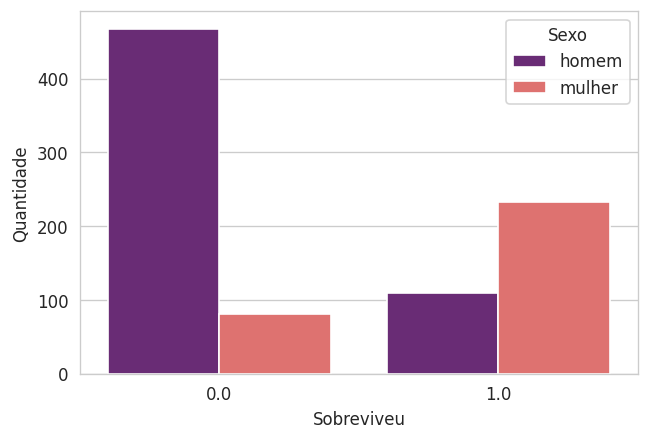

In [355]:
plt.figure(dpi=120)
sns.set_style('whitegrid')
sns.countplot("Sobreviveu", hue="Sexo", data=df, palette="magma")
plt.ylabel("Quantidade")
plt.show()

***
## **Chance de sobrevivência por porto de embarque**

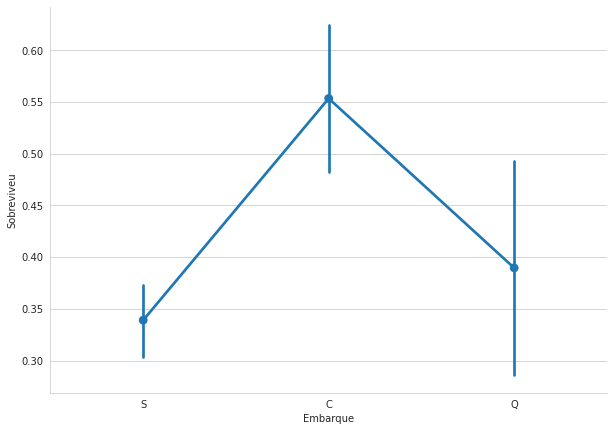

In [356]:
sns.catplot('Embarque','Sobreviveu',data=df,kind='point')
fig = plt.gcf()
fig.set_size_inches(9,6)

##### **Obs: observamos que quem entrou pelo portão C, teve mais chances de sobrevivência**

***
## **Visualizando dados faltantes do dataframe**

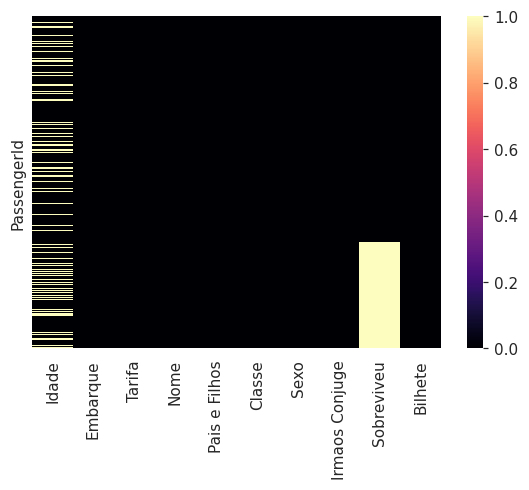

In [357]:
plt.figure(dpi=110)
sns.heatmap(df.isnull(),cmap="magma",yticklabels=False)
plt.show()

#### OBS: baseado neste gráfico, será realizado um modelo preditivo para preencher a quantidade e idades faltantes, para um melhor desempenho na predição dos sobreviventes

***
# **Features**
### **Descobrindo titulo das pessoas pelo nome**

In [358]:
df["Titulo"] = df["Nome"].str.extract(r",\s([a-zA-Z]+)\.")
df["Titulo"] = df["Titulo"].apply(lambda x:x if x in "Mr Miss Mrs Master".split() else "Outros")
df.head()

Idade Embarque   Tarifa  ... Sobreviveu           Bilhete  Titulo
PassengerId                           ...                                     
1             22.0        S   7.2500  ...        0.0         A/5 21171      Mr
2             38.0        C  71.2833  ...        1.0          PC 17599     Mrs
3             26.0        S   7.9250  ...        1.0  STON/O2. 3101282    Miss
4             35.0        S  53.1000  ...        1.0            113803     Mrs
5             35.0        S   8.0500  ...        0.0            373450      Mr

[5 rows x 11 columns]

***
## **Traduzindo titulos**

In [359]:
df["Titulo"].replace("Mr Miss Mrs Master".split(), "HomemAdulto Solteira Casada Menino".split(), inplace=True)
df.head()

Idade Embarque   Tarifa  ... Sobreviveu           Bilhete       Titulo
PassengerId                           ...                                          
1             22.0        S   7.2500  ...        0.0         A/5 21171  HomemAdulto
2             38.0        C  71.2833  ...        1.0          PC 17599       Casada
3             26.0        S   7.9250  ...        1.0  STON/O2. 3101282     Solteira
4             35.0        S  53.1000  ...        1.0            113803       Casada
5             35.0        S   8.0500  ...        0.0            373450  HomemAdulto

[5 rows x 11 columns]

***
## **Pegando sobrenome dos passageiros para identificar possíveis familiares**

In [360]:
df["Clan"] = df.Nome.apply(lambda x:x.split(",")[0])
df.head()

Idade Embarque   Tarifa  ...           Bilhete       Titulo       Clan
PassengerId                           ...                                          
1             22.0        S   7.2500  ...         A/5 21171  HomemAdulto     Braund
2             38.0        C  71.2833  ...          PC 17599       Casada    Cumings
3             26.0        S   7.9250  ...  STON/O2. 3101282     Solteira  Heikkinen
4             35.0        S  53.1000  ...            113803       Casada   Futrelle
5             35.0        S   8.0500  ...            373450  HomemAdulto      Allen

[5 rows x 12 columns]

## **Possíveis famílias**

In [361]:
df.groupby(["Clan"])["Nome"].count().sort_values(ascending=False)

Clan
Sage         11
Andersson    11
Asplund       8
Goodwin       8
Davies        7
             ..
Moutal        1
Moussa        1
Moss          1
Morrow        1
Abbing        1
Name: Nome, Length: 875, dtype: int64

### **Verificando Parentesco baseado  no sobrenome(Clan) e o bilhete**
##### **Verificando as possiveis maiores familias a bordo e sua taxa de sobrevivencia**
###### **Começando pela familia andersson**

In [362]:
clanAndersson = df[["Sobreviveu","Classe","Titulo","Nome","Clan","Bilhete","Embarque"]].loc[(df['Clan'] == "Andersson")].dropna()
clanAndersson

Sobreviveu  Classe       Titulo  ...       Clan  Bilhete Embarque
PassengerId                                   ...                             
14                  0.0       3  HomemAdulto  ...  Andersson   347082        S
69                  1.0       3     Solteira  ...  Andersson  3101281        S
120                 0.0       3     Solteira  ...  Andersson   347082        S
147                 1.0       3  HomemAdulto  ...  Andersson   350043        S
542                 0.0       3     Solteira  ...  Andersson   347082        S
543                 0.0       3     Solteira  ...  Andersson   347082        S
611                 0.0       3       Casada  ...  Andersson   347082        S
814                 0.0       3     Solteira  ...  Andersson   347082        S
851                 0.0       3       Menino  ...  Andersson   347082        S

[9 rows x 7 columns]

# **Visualizando sobreviventes do clã Andersson por bilhetes**

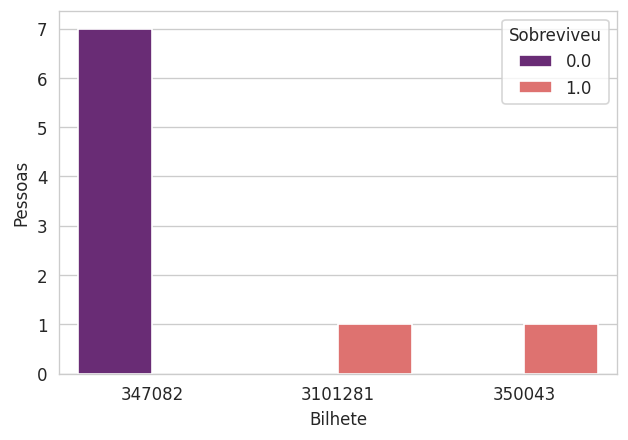

In [363]:
plt.figure(dpi=120)
sns.set_style("whitegrid")
sns.countplot("Bilhete",data=clanAndersson,hue="Sobreviveu", palette="magma")
plt.ylabel("Pessoas")
plt.show()

##### **Obs: Verificamos que haviam 7 pessoas da familia Andersson com o mesmo bilhete, e todos nao sobreviveram**
##### **Obs 2: Tambem foi verificado que todos do clan Andersson entraram pelo portão S e sao da terceira classe**
# **Clã Sage**

In [364]:
clanSage = df[["Sobreviveu","Classe","Titulo","Nome","Clan","Bilhete","Embarque"]].loc[(df['Clan'] == "Sage")].dropna()
clanSage

Sobreviveu  Classe       Titulo  ...  Clan   Bilhete Embarque
PassengerId                                   ...                         
160                 0.0       3       Menino  ...  Sage  CA. 2343        S
181                 0.0       3     Solteira  ...  Sage  CA. 2343        S
202                 0.0       3  HomemAdulto  ...  Sage  CA. 2343        S
325                 0.0       3  HomemAdulto  ...  Sage  CA. 2343        S
793                 0.0       3     Solteira  ...  Sage  CA. 2343        S
847                 0.0       3  HomemAdulto  ...  Sage  CA. 2343        S
864                 0.0       3     Solteira  ...  Sage  CA. 2343        S

[7 rows x 7 columns]

##### **Obs: Verificamos que todos da familia Sage possuiam o mesmo bilhete, e todos nao sobreviveram**
##### **Obs 2: Tambem foi verificado que todos do clan Sage entraram pelo portão S e sao da terceira classe**

  ***
  # **Iniciando primeiro modelo preditivo para preenchimento das idades faltantes**
  ***
 **Convertendo para Dummy**


In [365]:
dfDummy = pd.get_dummies(df, columns=["Embarque","Classe","Titulo"], drop_first=True)
dfDummy["Sexo"].replace("homem mulher".split(),[0,1], inplace=True)

In [366]:
dfDummy.drop(["Nome","Bilhete","Clan","Sobreviveu",],axis=1,inplace=True)
dfDummy.head(3)


Idade   Tarifa  ...  Titulo_Outros  Titulo_Solteira
PassengerId                  ...                                
1             22.0   7.2500  ...              0                0
2             38.0  71.2833  ...              0                0
3             26.0   7.9250  ...              0                1

[3 rows x 13 columns]

# **Separando train e test**
#### * Treinar com dados nao nulos
#### * Aplicar modelo em dados nulos


In [367]:
dfDummy.isnull().sum()

Idade                 263
Tarifa                  0
Pais e Filhos           0
Sexo                    0
Irmaos Conjuge          0
Embarque_Q              0
Embarque_S              0
Classe_2                0
Classe_3                0
Titulo_HomemAdulto      0
Titulo_Menino           0
Titulo_Outros           0
Titulo_Solteira         0
dtype: int64

In [368]:
train_idade = dfDummy.dropna()
test_idade = dfDummy[dfDummy['Idade'].isnull()].drop("Idade",axis=1)

# **Definindo X e y para treinar modelo**

In [369]:
X = train_idade.drop("Idade",axis=1)
y = train_idade["Idade"]

In [370]:
X.shape, y.shape

((1046, 12), (1046,))

## **Importar e instanciar modelo regressivo**

In [371]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

## **Efetuando treino**
#### Distribuindo 70% para treino e 30% para test

In [372]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=123)

In [373]:
lm.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Predição**

In [374]:
pred = lm.predict(Xtest)

# **Averiguando Score**

In [375]:
lm.score(Xtest, ytest)

0.4223411308159648

# **Averiguando a margem de desvio padrão**

In [376]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, pred)
rmse = np.sqrt(mse)
rmse

10.929054593804523

#### Obs: a margem de erro da idade é de 11 pra cima ou para baixo

# **Visualizando Residuos**

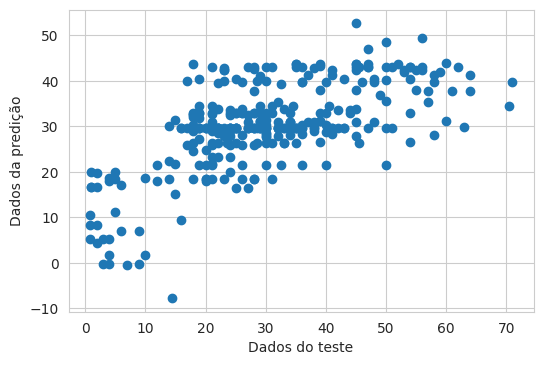

In [377]:
plt.figure(dpi=100)
plt.xlabel("Dados do teste")
plt.ylabel("Dados da predição")
plt.scatter(ytest, pred)
plt.show()

#### OBS: observamos que o modelo nao teve uma acuráciaa muito precisa, mas será o suficiente para preencher o restante da idade para aprimorar a predição de sobreviventes

# **Aplicando Modelo nos dados nulos**

In [378]:
pred_idade = lm.predict(test_idade)
test_idade["Idade"] = pred_idade

## **Verificando se há dados nulos depois da aplicação do modelo**

In [379]:
test_idade.isnull().sum()

Tarifa                0
Pais e Filhos         0
Sexo                  0
Irmaos Conjuge        0
Embarque_Q            0
Embarque_S            0
Classe_2              0
Classe_3              0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Outros         0
Titulo_Solteira       0
Idade                 0
dtype: int64

***
# **Concatenando os dataframes novamente ja com as idades faltantes preenchidas pelo modelo**

In [380]:
dfMinerado = pd.concat([test_idade,train_idade], sort=False)
dfMinerado.head()

Tarifa  Pais e Filhos  ...  Titulo_Solteira      Idade
PassengerId                          ...                            
6             8.4583              0  ...                0  34.499919
18           13.0000              0  ...                0  32.864665
20            7.2250              0  ...                0  28.991280
27            7.2250              0  ...                0  26.437712
29            7.8792              0  ...                1  23.164838

[5 rows x 13 columns]

***
# **Finalizado primeiro modelo que preveu a idade faltante, iniciando o segundo modelo para predizer os campos faltantes da coluna Sobreviveu**

### Criando uma faixa etária baseado na idade como forma de deixar a idade categórica para conversão em dummy, com o intuito de potencializar o modelo preditivo com mais dados

.


In [381]:
dfMinerado["Idade"] = dfMinerado["Idade"].astype(int)
dfMinerado["Faixa Etaria"] = pd.cut(dfMinerado["Idade"],bins=5)

In [382]:
dfMinerado = pd.get_dummies(dfMinerado, columns=["Faixa Etaria"], drop_first=True)
dfMinerado.head()

Tarifa  ...  Faixa Etaria_(62.6, 80.0]
PassengerId           ...                           
6             8.4583  ...                          0
18           13.0000  ...                          0
20            7.2250  ...                          0
27            7.2250  ...                          0
29            7.8792  ...                          0

[5 rows x 17 columns]

## **Engenharia de recursos(Familiares)**
### Baseado nas colunas "irmaos Conjuge" e "Pais e Filhos"

In [383]:
dfMinerado["Familiares"] = dfMinerado["Irmaos Conjuge"] + dfMinerado["Pais e Filhos"]

## **Visualizando correlação entre "Familiares", "Irmaos Conjuge" e "Pais e Filhos"**

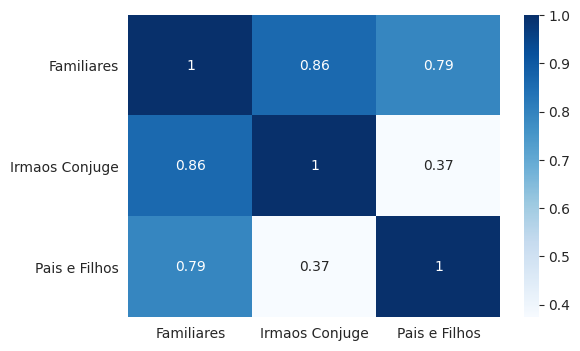

In [384]:
plt.figure(dpi=100)
sns.heatmap(dfMinerado[["Familiares","Irmaos Conjuge","Pais e Filhos"]].corr(),annot=True,cmap="Blues")
plt.show()

#### Obs: Podemos observar que há 86% de correlação entre a coluna "Familiares" e "Irmaos Conjuge", e 79% de correlação entre "Pais e Filhos" e "Familiares"

# **Agora iremos preparar o dataframe para predizer os sobreviventes, para isso, iremos reinserir a coluna sobreviveu no dataframe ja minerado**

In [385]:
dfMinerado["Sobreviveu"] = df["Sobreviveu"]

# **Atualizando o train e test**

In [386]:
train = dfMinerado.loc[train.index]
test = dfMinerado.loc[test.index]
test.drop("Sobreviveu", axis=1, inplace=True)

# **Treinando o modelo**
#### X receberá o dataframe inteiro menos a coluna  sobreviveu que iremos predizer, e y receberá apenas a coluna sobreviveu para realizar o treinamento

In [387]:
X = train.drop("Sobreviveu", axis=1)
y = train["Sobreviveu"]

In [388]:
X.shape, y.shape

((891, 18), (891,))

#### **Escolhendo colunas ideais para o modelo**

In [389]:

colunas = ['Tarifa', 'Pais e Filhos', 'Sexo', 'Irmaos Conjuge', 'Embarque_Q',
       'Embarque_S', 'Classe_2', 'Classe_3', 'Titulo_HomemAdulto',
       'Titulo_Menino', 'Titulo_Outros', 'Titulo_Solteira', 'Idade',
       'Faixa Etaria_(10.4, 27.8]', 'Faixa Etaria_(27.8, 45.2]',
       'Faixa Etaria_(45.2, 62.6]', 'Faixa Etaria_(62.6, 80.0]', 'Familiares']

X = X[colunas]
X.head()

Tarifa  Pais e Filhos  ...  Faixa Etaria_(62.6, 80.0]  Familiares
PassengerId                          ...                                       
1             7.2500              0  ...                          0           1
2            71.2833              0  ...                          0           1
3             7.9250              0  ...                          0           0
4            53.1000              0  ...                          0           1
5             8.0500              0  ...                          0           0

[5 rows x 18 columns]

___

In [390]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=123)

# **Machine Learning**
### **Importando modelos**

In [391]:
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## **Criação de classe para auxiliar a execução dos modelos importados**
##### será uma classe para evitar repetições de códigos desnecessária

In [392]:
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)

## **Dicionario de Modelos Preditivos**

In [393]:
modelos = [{'nome': 'Logistic Regression',
            'modelo': LogisticRegression},
           {'nome': 'etree',
            'modelo': ExtraTreesClassifier},
           {'nome': 'gradboost',
             'modelo': GradientBoostingClassifier}, 
           {'nome': 'adaboost',
             'modelo': AdaBoostClassifier},
           {'nome': 'SVC',
            'modelo': SVC},
           {'nome': 'KNN',
            'modelo': KNeighborsClassifier},
           {'nome': 'GaussianNB',
            'modelo': GaussianNB},
           {'nome': 'Perceptron',
            'modelo': Perceptron},
           {'nome': 'LinearSVC',
            'modelo': LinearSVC},
           {'nome': 'SGD',
            'modelo': SGDClassifier},
           {'nome': 'Dtree',
            'modelo': DecisionTreeClassifier},
           {'nome': 'RForest',
            'modelo': RandomForestClassifier}
          ]

## **Executando varios modelos preditivos de uma vez através da classe criada**

In [394]:
resultados = []
for model in modelos:
    x = ModeloAuxiliar(clf=model['modelo'])
    # treinar o modelo
    x.fit(Xtrain, ytrain)
    
    # gerar predicao
    x_pred = x.predict(Xtest)
    
    # gerar score
    acuracidade = round(x.score(Xtest,ytest)*100,2)
    
    resultados.append({'nome': model['nome'],
                       'score': acuracidade,
                       'pred': x_pred })

# **Ranking de Modelos Por Score**
###### [Voltar para início](#topo)


In [395]:

models = pd.DataFrame(resultados)
modelos = models[['nome','score']].sort_values(by='score', ascending=False)
modelos

nome  score
2             gradboost  85.45
3              adaboost  83.96
0   Logistic Regression  82.84
11              RForest  82.09
6            GaussianNB  79.48
1                 etree  79.10
8             LinearSVC  77.99
10                Dtree  76.49
4                   SVC  72.76
5                   KNN  72.76
7            Perceptron  45.90
9                   SGD  43.66